# Amazon Sentiment Analysis

This project analyzes customer review data from Amazon, sourced from a SQLite database.  
It explores product popularity, reviewer behavior, and uses **sentiment analysis** to extract key insights from review summaries.

We will:
- Clean and prepare the data,
- Explore product-level and reviewer-level behavior,
- Perform sentiment analysis using **TextBlob**,
- Extract the most common positive and negative review phrases.


#### The column or features in the dataset:
    
- Id
- ProductId — unique identifier for the product
- UserId — unqiue identifier for the user
- ProfileName
- Score — rating between 1 and 5
- Time — timestamp for the review
- Summary — brief summary of the review
- Text — text of the review


### Import Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Load Data from SQLite Database

In [3]:
#### We can check online its table name of "database.sqlite" on https://sqliteonline.com/

In [4]:
import sqlite3

In [5]:
con = sqlite3.connect(r'C:\Users\dimas/database.sqlite')

In [6]:
type(con)

sqlite3.Connection

### 2. Read data from Sqlite database

In [7]:
pd.read_sql_query("SELECT * FROM REVIEWS", con)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [8]:
df = pd.read_sql_query("SELECT * FROM REVIEWS", con)

In [9]:
type(df)

pandas.core.frame.DataFrame

### 3. Data Cleaning & Preparation
* remove duplicate rows
* convert "time" feature data-type to date-time)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### 3.1 Deduplication

* Deduplication means removing duplicate rows, It is necessary to remove duplicates in order to get unbaised results,
    
* Checking duplicates based on UserId, ProfileName, Time, Text as No user can type a review on same exact time for different products, so we will remove those records

In [11]:
df.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [12]:
df[df.duplicated(['UserId', 'ProfileName' ,'Time' ,'Text'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
2323,2324,B0001VWE0C,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [13]:
### ie , approx 174521 are duplicated .. so we have to remove these duplicate rows ..

In [14]:
df_valid = df.drop_duplicates(subset=['UserId', 'ProfileName' ,'Time' ,'Text'])

In [15]:
df_valid.shape

(393933, 10)

#### 3.2 Time Conversion

* convert time feature data-type from int64 to date-time !

In [16]:
df_valid.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [17]:
df_valid['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 393933, dtype: int64

In [18]:
pd.to_datetime(df_valid['Time'])

### as default is : unix start time "1970-01-01"

### 00:00:01.303862400 ->> by-default this time is in "nano-second" as default value of unit = "ns"
### so lets customize "unit" parameter to get time in second ..

0        1970-01-01 00:00:01.303862400
1        1970-01-01 00:00:01.346976000
2        1970-01-01 00:00:01.219017600
3        1970-01-01 00:00:01.307923200
4        1970-01-01 00:00:01.350777600
                      ...             
568449   1970-01-01 00:00:01.299628800
568450   1970-01-01 00:00:01.331251200
568451   1970-01-01 00:00:01.329782400
568452   1970-01-01 00:00:01.331596800
568453   1970-01-01 00:00:01.338422400
Name: Time, Length: 393933, dtype: datetime64[ns]

In [19]:
df_valid['Time'] = pd.to_datetime(df_valid['Time'] , unit='s')

In [20]:
df_valid['Time']

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 393933, dtype: datetime64[ns]

## 4. Exploratory Data Analysis

#### 4.1 Which product has good number of reviews ? 

In [21]:
df_valid.shape

(393933, 10)

In [22]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [23]:
df_valid['ProductId'].nunique()

## We can see that there are 67624 types of products in the dataset.

67624

In [24]:
### Among 67624 products , lets pick most sold product for Analysis

### We will consider that product as most sold product which must be sold atleast 500 times..

##### 4.1.1 Count Reviews per Product

In [25]:
prod_count = df['ProductId'].value_counts().to_frame()

In [26]:
prod_count

,count
ProductId,
B007JFMH8M,913
B002QWHJOU,632
B0026RQTGE,632
B002QWP89S,632
B002QWP8H0,632
...,...
B000M6CTGK,1
B000MAST88,1
B0064KU9HO,1


In [27]:
prod_count['count']>500

ProductId
B007JFMH8M     True
B002QWHJOU     True
B0026RQTGE     True
B002QWP89S     True
B002QWP8H0     True
              ...  
B000M6CTGK    False
B000MAST88    False
B0064KU9HO    False
B0001WYNFA    False
B000KOUOHU    False
Name: count, Length: 74258, dtype: bool

In [28]:
prod_count[prod_count['count']>500]

,count
ProductId,
B007JFMH8M,913
B002QWHJOU,632
B0026RQTGE,632
B002QWP89S,632
B002QWP8H0,632
B003B3OOPA,623
B001EO5Q64,567
B007M83302,564
B007M832YY,564


##### 4.1.2 Filter Most Reviewed Products

In [29]:
freq_prod = prod_count[prod_count['count']>500].index

In [30]:
freq_prod  ## most sold products

Index(['B007JFMH8M', 'B002QWHJOU', 'B0026RQTGE', 'B002QWP89S', 'B002QWP8H0',
       'B003B3OOPA', 'B001EO5Q64', 'B007M83302', 'B007M832YY', 'B0013NUGDE',
       'B0026KNQSA', 'B006HYLW32', 'B001RVFEP2', 'B000VK8AVK', 'B001RVFERK',
       'B0026KPDG8', 'B000KV7ZGQ', 'B000KV61FC', 'B005K4Q37A', 'B005K4Q34S',
       'B0013A0QXC', 'B005K4Q4LK', 'B000NMJWZO', 'B005K4Q1YA', 'B000UBD88A',
       'B003GTR8IO', 'B0090X8IPM', 'B007Y59HVM', 'B005ZBZLT4'],
      dtype='object', name='ProductId')

##### 4.1.3 lets separate dataframe of most sold products only !

In [32]:
df_valid['ProductId'].isin(freq_prod)

#### .isin() checks whether each value in a column exists in a given list, set, or Series.

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Name: ProductId, Length: 393933, dtype: bool

In [33]:
freq_prod_df = df_valid[df_valid['ProductId'].isin(freq_prod)]

### It filters the df_valid DataFrame to include only the rows where ProductId is in the list freq_prod, and stores the result in a new DataFrame called freq_prod_df.


In [34]:
freq_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,2011-10-18,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,2011-10-14,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,2011-09-28,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,2011-09-24,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,2011-09-23,Greenies review,This review is for a box of Greenies Lite for ...
...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,2012-07-29,Yummy!,I loved these cookies and so did my kids. You ...
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,2012-07-28,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,2012-07-28,Delicious!,These are great for a quick snack! They are sa...
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,2012-07-28,yummy,I love the Quaker soft baked cookies. The rea...


##### 4.1.4 Visualize Score Distribution of Most Reviewed Products

In [35]:
freq_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

<Axes: xlabel='count', ylabel='ProductId'>

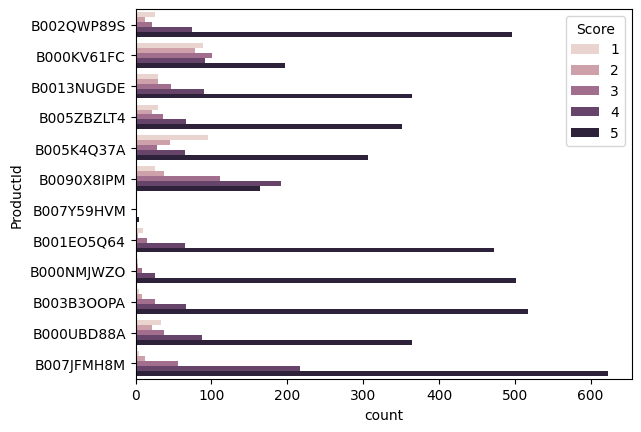

In [36]:
sns.countplot(y = 'ProductId' , data = freq_prod_df , hue='Score')

#### 4.2 Is there any difference between behaviour of frequent viewers & not frequent viewers ?



First lets understand who are frequent viewers & who are not frequent viewers 

* Frequent viewers are those who have bought products atleast 50 times or more 
* Non-Frequent viewers are those who have bought products less than 50 times 




In [37]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

##### 4.2.1 Define Viewer Types

In [38]:
x = df_valid['UserId'].value_counts()

#total review per user

In [39]:
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    278
A281NPSIMI1C2R    259
A1YUL9PCJR3JTY    214
A1Z54EM24Y40LL    211
                 ... 
A1FVF43OQJE2AH      1
A1MNIZYWGVRVGF      1
A2CLE7G5FK24AU      1
A10R47UIIJHJQT      1
A25RYX4NFWDJ2N      1
Name: count, Length: 256059, dtype: int64

In [41]:
def viewer_type(user):
    if x[user] > 50:
        return "Frequent"
    else:
        return "Not Frequent"

df_valid['viewer_type'] = df_valid['UserId'].apply(viewer_type)

In [42]:
df_valid.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent


##### 4.2.2 lets separate dataframe for both "frequent_viewers" & for "not_frequent_viewers"

In [43]:
df_valid['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [45]:
not_freq_df = df_valid[df_valid['viewer_type']=='Not Frequent']

freq_df = df_valid[df_valid['viewer_type']=='Frequent']

In [46]:
not_freq_df['Score'].value_counts()

Score
5    245197
4     54115
1     35957
3     28872
2     20434
Name: count, dtype: int64

In [47]:
freq_df['Score'].value_counts()

Score
5    5765
4    1979
3     897
2     368
1     349
Name: count, dtype: int64

##### 4.2.3 lets plot above results using bar-plot !

<Axes: xlabel='Score'>

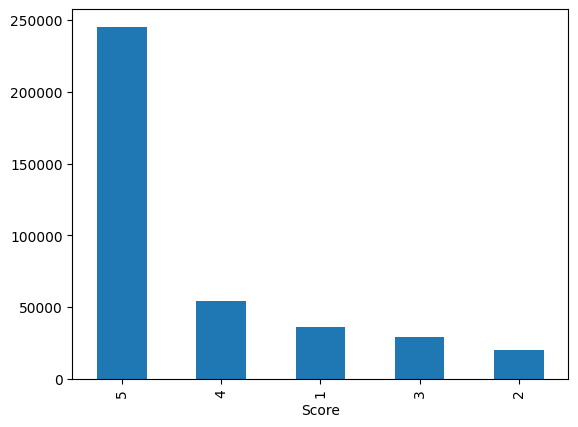

In [49]:
not_freq_df['Score'].value_counts().plot(kind='bar')

<Axes: xlabel='Score'>

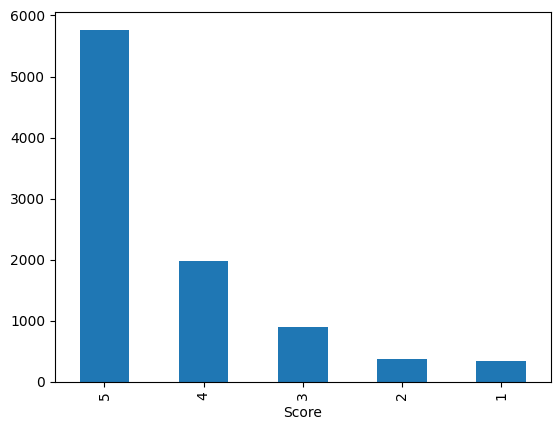

In [50]:
freq_df['Score'].value_counts().plot(kind='bar')


The distribution of ratings among frequent reviewers is similar to that of all reviews.  However, we can see that frequent reviewers give less 5-star reviews and less 1-star review. Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.



## 5. Sentiment Analysis 

#### What is sentiment analysis?

Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text

Some examples of applications for sentiment analysis include:

    1. Analyzing the social media discussion around a certain topic
    2. Evaluating survey responses
    3. Determining whether product reviews are positive or negative


In [51]:
from textblob import TextBlob

In [53]:
df_valid['Summary'][0]

'Good Quality Dog Food'

In [54]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [55]:
df_valid.shape

(393933, 11)

In [57]:
sample = df_valid[0:50000]

### if u do not have good specifications , then its good to consider sample of data ..

In [58]:
polarity = []

for text in sample['Summary']: # list which will contain the polarity of the Summaries 
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)
    

In [59]:
len(polarity)

50000

In [60]:
sample['polarity'] = polarity

In [61]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,viewer_type,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,Not Frequent,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Frequent,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,Not Frequent,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,Not Frequent,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,Not Frequent,0.8


In [62]:
sample_negative= sample[sample['polarity']<0]

sample_positive= sample[sample['polarity']>0]

In [65]:
from collections import Counter

# Counter is from Python's built-in collections module.

# It counts how many times each item appears in a list (like value_counts() but more flexible).

In [66]:
Counter(sample_negative['Summary']).most_common(10) ## most used negative keywords

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('Terrible', 15),
 ('Horrible', 15),
 ('disappointed', 15),
 ('Disgusting', 12),
 ('not good', 11)]

In [67]:
Counter(sample_positive['Summary']).most_common(10) ## most used positive keywords

[('Delicious!', 208),
 ('Delicious', 204),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 77),
 ('Great!', 70),
 ('Good stuff', 51),
 ('Awesome', 50)]

# Key Insights

#### 1. Most Reviewed Products by Score (Countplot)

* The most reviewed products are dominated by 5-star reviews.

* Product ID B002QWP89S and B007JFMH8M have the highest number of reviews with overwhelmingly positive scores.

* Some products like B000KV61FC and B005K4Q37A have a more varied distribution, including several lower ratings (1–3).

Insight:
The majority of popular products tend to receive highly positive reviews (Score = 5), which may indicate strong customer satisfaction or loyal customer bases. However, a few high-review products also receive mixed feedback.

#### 2. Rating Distribution: Non-Frequent Reviewers

* Around 245,000 reviews from non-frequent users are 5 stars.

* The number of lower ratings (1–2) is relatively small.

Insight:
Non-frequent reviewers tend to give more 5-star reviews than any other score. This could mean occasional users are more inclined to share positive experiences.

#### 3. Rating Distribution: Frequent Reviewers

* Frequent reviewers also give the most 5-star ratings, but with more balanced distribution.

* There are more 3 and 4-star reviews compared to non-frequent reviewers.

* The number of 1-star reviews is slightly higher relative to their overall volume.

Insight:
Frequent reviewers are more critical and likely to provide detailed and nuanced feedback. They tend to avoid extreme ratings and give more middle-range scores (3–4).

#### 4. Most Common Keywords in Positive vs. Negative Reviews

* Negative Reviews: Frequently contain words like “Disappointed”, “Bland”, “Terrible”, and “Awful”.

* Positive Reviews: Dominated by “Delicious”, “Great product”, “Excellent”, and “Love it!”.

Insight:
Negative reviews are often driven by unmet expectations and poor taste/quality. In contrast, positive reviews emphasize taste (e.g., Delicious) and satisfaction (Great, Excellent, Love it!), which is useful for product development or marketing focus.

#  Conclusion

* The dataset is heavily skewed toward positive feedback, especially among non-frequent users.

* Frequent users are more reliable and consistent in their ratings but less likely to leave extreme reviews.

* Product popularity (number of reviews) does not guarantee uniform satisfaction; some popular products still attract low ratings.

* Sentiment analysis using review summaries shows clear patterns in customer language, which can be leveraged to detect product issues or strengths early.

